# This notebook demonstrates how Opxs can be matched to all possible liquids, including various equilibrium tests. 
- Users should first go through the example Opx_Liq_Thermobarometry.ipynb

## Loading python things

In [1]:
import numpy as np
import pandas as pd
import sys
sys.path.append("../..") # This allows you to put the python file in the folder above. So you can have lots of sub folders
import matplotlib.pyplot as plt
import Thermobar as pt
import sympy as sym

In [2]:
out1=pt.import_excel('Opx_Liq_Example.xlsx', sheet_name="Separate_Liqs")
my_input=out1['my_input']
Liqs=out1['Liqs']

C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


We have set Fe3Fet_Liq to zero, as you only entered FeOt. You can input a Fe3FeT_Liq column to specify this value instead


In [14]:
Liqs

C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,Cr2O3_Liq,P2O5_Liq,H2O_Liq,Fe3FeT_Liq,NiO_Liq,CoO_Liq,CO2_Liq,Sample_ID_Liq
0,51.1,0.93,17.5,8.91,0.18,6.09,11.50,3.53,0.17,0,0.15,3.8,0,0.0,0.0,0.0,0
1,51.5,1.19,19.2,8.70,0.19,4.98,10.00,3.72,0.42,0,0.14,6.2,0,0.0,0.0,0.0,1
2,59.1,0.54,19.1,5.22,0.19,3.25,7.45,4.00,0.88,0,0.31,6.2,0,0.0,0.0,0.0,2
3,52.5,0.98,19.2,8.04,0.20,4.99,9.64,4.15,0.21,0,0.14,6.2,0,0.0,0.0,0.0,3
4,56.2,0.34,20.4,5.88,0.20,2.58,7.18,6.02,1.02,0,0.23,6.2,0,0.0,0.0,0.0,4
5,51.3,0.93,17.2,8.91,0.18,6.09,11.50,4.00,0.17,0,0.15,3.8,0,0.0,0.0,0.0,5


In [3]:
out2=pt.import_excel('Opx_Liq_Example.xlsx', sheet_name="Separate_Opxs")
my_input=out2['my_input']
Opxs=out2['Opxs']

C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Initially, lets try with the default filter - which calculates Kd using the Si content of the liquid following putirka (2008)
- We see that this yields only 3 matches for just a single Opx

In [4]:
Match1=pt.calculate_opx_liq_press_temp_matching(liq_comps=Liqs, opx_comps=Opxs, equationT="T_Put2008_eq28a",
                                         equationP="P_Put2008_eq29a")
Match1['Av_PTs']

C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Considering 30 Liq-Opx pairs, be patient if this is >>1 million!
Finished calculating Ps and Ts, now just averaging the results. Almost there!
Finished!


,No. of Cpxs averaged,Mean_Sample_ID_Opx,st_dev_T_K_calc,Mean_T_K_calc,st_dev_P_kbar_calc,Mean_P_kbar_calc,Mean_Delta_Kd_Fe_Mg_Fe2,Mean_SiO2_Liq,Mean_TiO2_Liq,Mean_Al2O3_Liq,...,Mean_Di_Opx,Mean_Mgno_OPX,Mean_ID_OPX,Mean_ln_Fm2Si2O6_liq,Mean_ln_FmAl2SiO6_liq,Mean_Kd_Fe_Mg_Fet,Mean_Kd_Fe_Mg_Fe2,Mean_Ideal_Kd,Mean_Mgno_Liq_noFe3,Mean_Mgno_Liq_Fe2
0,3,Opx1,56.266725,1351.992696,1.302965,2.83631,0.051714,53.833333,0.8,17.933333,...,0.028142,0.82885,0.0,5.504581,-2.776023,0.244111,0.244111,0.295824,0.541487,0.541487


### Perhaps we now want to look at the distribution of Kd values in the matches, to work out what might be a reasonable cut off. 
- by stating "Return_All_Matches=True", the code doesn't apply any equilibrium filters
- Red line shows equilibrium filter used in Match 1 above (+-0.06)

C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Considering 30 Liq-Opx pairs, be patient if this is >>1 million!


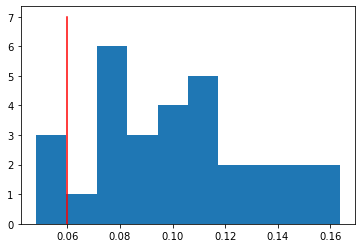

In [5]:
Match2=pt.calculate_opx_liq_press_temp_matching(liq_comps=Liqs, opx_comps=Opxs, equationT="T_Put2008_eq28a",
                                         equationP="P_Put2008_eq29a", Return_All_Matches=True)
plt.hist(Match2['Delta_Kd_Fe_Mg_Fe2'])
plt.plot([0.06, 0.06], [0, 7], '-r')

### Here, we specify that we want a match within +-0.12 (e.g., 2 sigma)

In [6]:
Match3=pt.calculate_opx_liq_press_temp_matching(liq_comps=Liqs, opx_comps=Opxs, equationT="T_Put2008_eq28a",
                                         equationP="P_Put2008_eq29a", KdErr=0.12)
Av_Matches3=Match3['Av_PTs']
All_Matches3=Match3['All_PTs']

C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Considering 30 Liq-Opx pairs, be patient if this is >>1 million!
Finished calculating Ps and Ts, now just averaging the results. Almost there!
Finished!


## Plotting these matches up

C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0, 0.5, 'Pressure (kbar)')

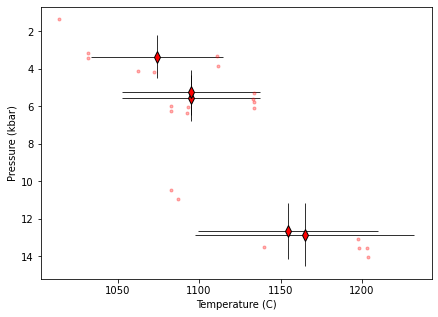

In [7]:
fig, ((ax1)) = plt.subplots(1, 1, figsize=(7, 5), sharex=True, sharey=True)

ax1.plot(All_Matches3['T_K_calc']-273.15, All_Matches3['P_kbar_calc'], '.', color='red', alpha=0.3, label="all matches")

ax1.errorbar(Av_Matches3['Mean_T_K_calc']-273.15,  Av_Matches3['Mean_P_kbar_calc'],
             xerr=Av_Matches3['st_dev_T_K_calc'], 
             yerr=Av_Matches3['st_dev_P_kbar_calc'],
             fmt='d', ecolor='k', elinewidth=0.8, 
             mfc='red', ms=8, mec='k',  label='Averaged per Cpx')

ax1.invert_yaxis()

#ax1.set_xlim([700, 1200])
ax1.set_xlabel('Temperature (C)')
ax1.set_ylabel('Pressure (kbar)')

## Further flexibility
- Instead of calculating Kd as a function of melt Si, which is defualt, you can also specify a value of Kd Match and Kd error

In [8]:
Match4=pt.calculate_opx_liq_press_temp_matching(liq_comps=Liqs, opx_comps=Opxs, equationT="T_Put2008_eq28a",
                                         equationP="P_Put2008_eq29a", KdMatch=0.29, KdErr=0.12)
Av_Matches4=Match4['Av_PTs']
All_Matches4=Match4['All_PTs']

C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Considering 30 Liq-Opx pairs, be patient if this is >>1 million!
Finished calculating Ps and Ts, now just averaging the results. Almost there!
Finished!
